In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import joblib


In [40]:
#leemos los datos
data = pd.read_csv("../dataset/data_evaluacion.csv")
data.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [41]:
#Asiganmos nombres a las columnas sin etiquetas
data.columns = [
    'edad',                # age
    'clase_laboral',       # workclass
    'fnlwgt',              # continuous (final weight)
    'educacion',           # education
    'anios_educacion_dedicados',       # continuous (education-num)
    'estado_civil',        # marital-status
    'ocupacion',           # occupation
    'relacion',            # relationship
    'raza',                # race
    'sexo',                # sex
    'ganancia_capital',    # continuous (capital-gain)
    'perdida_capital',     # continuous (capital-loss)
    'horas_por_semana',    # continuous (hours-per-week)
    'pais_origen',         # native-country
    'ingreso'              # income
]
data.head(5)


,edad,clase_laboral,fnlwgt,educacion,anios_educacion_dedicados,estado_civil,ocupacion,relacion,raza,sexo,ganancia_capital,perdida_capital,horas_por_semana,pais_origen,ingreso
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [42]:
#verificamos la cantidad de filas y columnas

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   edad                       48841 non-null  int64 
 1   clase_laboral              48841 non-null  object
 2   fnlwgt                     48841 non-null  int64 
 3   educacion                  48841 non-null  object
 4   anios_educacion_dedicados  48841 non-null  int64 
 5   estado_civil               48841 non-null  object
 6   ocupacion                  48841 non-null  object
 7   relacion                   48841 non-null  object
 8   raza                       48841 non-null  object
 9   sexo                       48841 non-null  object
 10  ganancia_capital           48841 non-null  int64 
 11  perdida_capital            48841 non-null  int64 
 12  horas_por_semana           48841 non-null  int64 
 13  pais_origen                48841 non-null  object
 14  ingres

In [43]:
#verificamos datos nulos
data.isnull().sum()

edad                         0
clase_laboral                0
fnlwgt                       0
educacion                    0
anios_educacion_dedicados    0
estado_civil                 0
ocupacion                    0
relacion                     0
raza                         0
sexo                         0
ganancia_capital             0
perdida_capital              0
horas_por_semana             0
pais_origen                  0
ingreso                      0
dtype: int64

In [44]:
#Mínimos y máximos de categorías numéricas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,48841.0,38.643578,13.710650,17.0,28.0,37.0,48.0,90.0
fnlwgt,48841.0,189666.430786,105603.887256,12285.0,117555.0,178147.0,237646.0,1490400.0
anios_educacion_dedicados,48841.0,10.078029,2.570965,1.0,9.0,10.0,12.0,16.0
ganancia_capital,48841.0,1079.045208,7452.093700,0.0,0.0,0.0,0.0,99999.0
perdida_capital,48841.0,87.504105,403.008483,0.0,0.0,0.0,0.0,4356.0
horas_por_semana,48841.0,40.422391,12.391571,1.0,40.0,40.0,45.0,99.0


1. La edad minima es de 17 y máxima de 90
2. el mínimo de años dedicados a estuidar es de 1 año y el máximo de 16
3. Las horas máximas dedicadasa  estudiar es de 1 hora por semana mínimo y 99 horas por semana máximo.

In [45]:
#reemplazamos los registos ? con valores nulos
data[data == '?'] = np.nan
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   edad                       48841 non-null  int64 
 1   clase_laboral              46042 non-null  object
 2   fnlwgt                     48841 non-null  int64 
 3   educacion                  48841 non-null  object
 4   anios_educacion_dedicados  48841 non-null  int64 
 5   estado_civil               48841 non-null  object
 6   ocupacion                  46032 non-null  object
 7   relacion                   48841 non-null  object
 8   raza                       48841 non-null  object
 9   sexo                       48841 non-null  object
 10  ganancia_capital           48841 non-null  int64 
 11  perdida_capital            48841 non-null  int64 
 12  horas_por_semana           48841 non-null  int64 
 13  pais_origen                47984 non-null  object
 14  ingres

In [46]:
# Rellenar valores nulos
for col in ['clase_laboral', 'ocupacion', 'pais_origen']:
    mode_value = data[col].mode()[0]  
    data[col] = data[col].fillna(mode_value) 

# Verificar valores nulos
print("Datos nulos después de rellenar:")
print(data.isnull().sum())

Datos nulos después de rellenar:
edad                         0
clase_laboral                0
fnlwgt                       0
educacion                    0
anios_educacion_dedicados    0
estado_civil                 0
ocupacion                    0
relacion                     0
raza                         0
sexo                         0
ganancia_capital             0
perdida_capital              0
horas_por_semana             0
pais_origen                  0
ingreso                      0
dtype: int64


In [47]:
data.head(5)

,edad,clase_laboral,fnlwgt,educacion,anios_educacion_dedicados,estado_civil,ocupacion,relacion,raza,sexo,ganancia_capital,perdida_capital,horas_por_semana,pais_origen,ingreso
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [48]:
# Convertimos variables categóricas a dummies
data = pd.get_dummies(data, columns=[
    'clase_laboral', 'educacion', 'estado_civil', 'ocupacion', 
    'relacion', 'raza', 'sexo', 'pais_origen'
])

data.head()

,edad,fnlwgt,anios_educacion_dedicados,ganancia_capital,perdida_capital,horas_por_semana,ingreso,clase_laboral_Federal-gov,clase_laboral_Local-gov,clase_laboral_Never-worked,...,pais_origen_Portugal,pais_origen_Puerto-Rico,pais_origen_Scotland,pais_origen_South,pais_origen_Taiwan,pais_origen_Thailand,pais_origen_Trinadad&Tobago,pais_origen_United-States,pais_origen_Vietnam,pais_origen_Yugoslavia
0,50,83311,13,0,0,13,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,215646,9,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,53,234721,7,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,28,338409,13,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,37,284582,14,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [49]:
#Caracteristicas y variable objetivo 
x = data.drop(columns=['ingreso'], axis=1)
y = data['ingreso']


In [50]:
joblib.dump(x.columns, 'x_columns.pkl')

['x_columns.pkl']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)


In [52]:
scaler = StandardScaler()

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [53]:
# Entrenar el modelo
modelo = LogisticRegression(max_iter=1000, multi_class='auto')
modelo.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [54]:
# Guardar el modelo y el escalador
joblib.dump(modelo, 'modelo.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [55]:
# Predecir en el conjunto de prueba y entrenamiento
y_pred_test = modelo.predict(x_test_scaled)

In [56]:
# Evalaucion del modelo
y_pred=modelo.predict(x_test)
print('Train Accuracy : %.5f' % modelo.score(x_train_scaled, y_train))
print('Test Accuracy : %.5f' % modelo.score(x_test_scaled, y_test))
print("Precisión del modelo:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))

# si la diferencia entre train y test del modelo es mas de 10 es porque tiene underfiting (le faltan datos)
# si la diferencia entre test y precisión del modelo es mas de 10 es porque tiene overfiting (el modelo esta memorizando)


Train Accuracy : 0.85258
Test Accuracy : 0.85123
Precisión del modelo: 0.8512250051184058
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91     11132
        >50K       0.74      0.58      0.65      3521

    accuracy                           0.85     14653
   macro avg       0.81      0.76      0.78     14653
weighted avg       0.84      0.85      0.84     14653



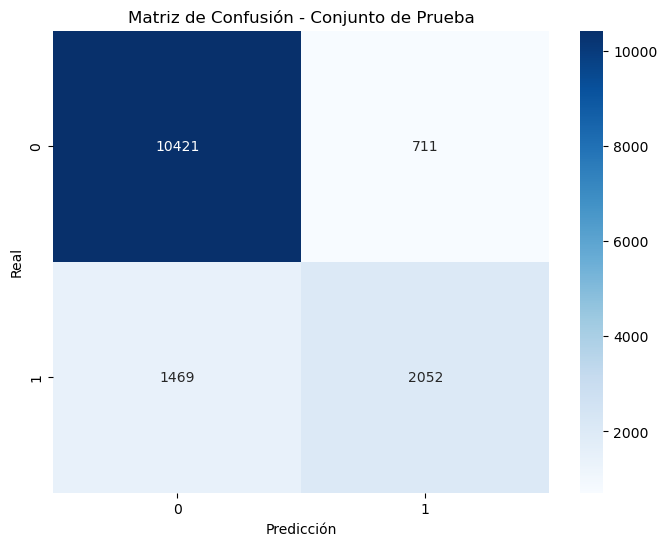

In [57]:
# Mostrar la matriz de confusión en el conjunto de prueba
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Conjunto de Prueba')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

Aditimulye. (2021, July 4). Adult Income Dataset | From scratch. https://www.kaggle.com/code/aditimulye/adult-income-dataset-from-scratch